In [10]:
# imports
import sklearn as sk
import seaborn as sb 
import pandas as pd 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

print("the sklearn version is {}".format(sk.__version__))
print("the pandas version is {}".format(pd.__version__))
print("the seaborn version is {}".format(sb.__version__))



the sklearn version is 0.23.1
the pandas version is 1.0.2
the seaborn version is 0.10.1


In [6]:
# load the data 
digits = load_digits()

print("the digits data is of type {} and has headers {}".format(type(digits), list(digits)))


the digits data is of type <class 'sklearn.utils.Bunch'> and has headers ['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']


In [7]:
# get the features and labels
X = digits.data
y = digits.target

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("the train data is of shape {} and type {}".format(X_train.shape, type(X_train)))
print("the test data is of shape {} and type {}".format(X_test.shape, type(X_test)))



the train data is of shape (1347, 64) and type <class 'numpy.ndarray'>
the test data is of shape (450, 64) and type <class 'numpy.ndarray'>


In [8]:
# build the model
model = GaussianNB()

# train the model 
model.fit(X_train, y_train)

# predict the test data
y_predict = model.predict(X_test)

# get the accuracy score
accuracy = accuracy_score(y_test, y_predict)
print("the accuracy sciore for the gaussiannb model is {}".format(accuracy))


the accuracy sciore for the gaussiannb model is 0.8333333333333334


In [9]:
# build the confusion matrix
confusion = confusion_matrix(y_test, y_predict)

print("the confusion matrix for the gaussiannb model is \n {}".format(confusion))

the confusion matrix for the gaussiannb model is 
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  4  0]
 [ 0  7 20  2  0  0  0  0 15  0]
 [ 0  0  0 39  0  0  0  1  5  0]
 [ 0  1  0  0 31  0  0  6  0  0]
 [ 0  1  0  1  0 43  0  3  0  0]
 [ 0  0  1  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  6  0  1  0  1  0  2 38  0]
 [ 0  2  0  4  1  0  0  3  7 30]]


In [11]:
confusion.T

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  7,  0,  1,  1,  0,  0,  6,  2],
       [ 0,  0, 20,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  2, 39,  0,  1,  0,  0,  1,  4],
       [ 0,  0,  0,  0, 31,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  6,  3,  0, 47,  2,  3],
       [ 0,  4, 15,  5,  0,  0,  0,  0, 38,  7],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30]])

Text(33.0, 0.5, 'predicted value')

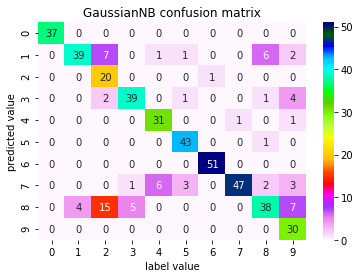

In [15]:
# build the heat map
plt.figure(1)
axis = plt.axes()
sb.heatmap(confusion.T, annot=True, fmt="d", cmap="gist_ncar_r", ax=axis)
axis.set_title("GaussianNB confusion matrix")
plt.xlabel('label value')
plt.ylabel('predicted value')

